# Problem Set 2: Window based Stereo Matching
---
## Setup

In [1]:
# IPython magic
%load_ext autoreload
%autoreload 2
# Matplotlib magic
%matplotlib inline

In [16]:
# Imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import match_template
from scipy.signal import correlate2d
# Matplotlib params
plt.rcParams['figure.figsize'] = (14.0, 6.0)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [17]:
# Change to True if Jupyter Widgets extension is installed
IS_INTERACTIVE = False
# Turn widgets on-off
if IS_INTERACTIVE:
    from ipywidgets import interact
else:
    def interact(**kwargs):
        def decorator(f):
            return f();
        return decorator

---
## 1. SSD Stereo (Simple Image)

In [18]:
# Load images
img1l = cv2.imread('Data/leftTest.png', 0).astype(np.float)
img1l = img1l.astype(np.float) / 255
img1r = cv2.imread('Data/rightTest.png', 0)
img1r = img1r.astype(np.float) / 255

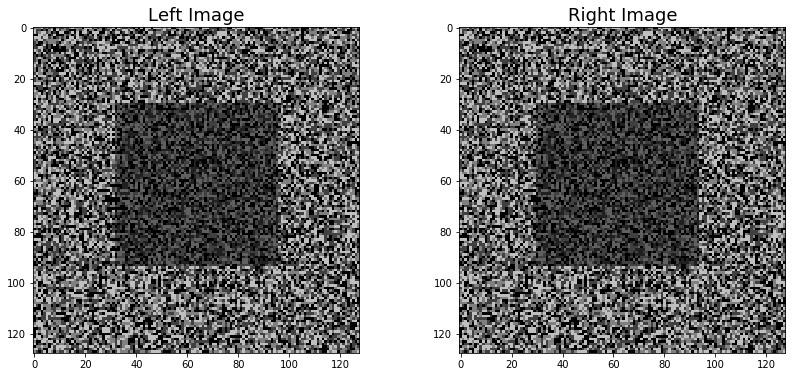

In [19]:
# Plot
fig, ax = plt.subplots(1, 2)
ax[0].set_title('Left Image')
ax[0].imshow(img1l, clim=(0,1))
ax[1].set_title('Right Image')
ax[1].imshow(img1r, clim=(0,1));

In [52]:
def generate_depth_image(imgl, imgr, window_size=9, max_offset=20):
    # Initializations
    k = window_size // 2
    h, w = imgl.shape
    factor = 1.0 / max_offset
    depth = np.zeros((h, w), np.float)
    # Iterate over each pixel
    for y in range(k, h-k):
        for x in range(k, w-k):
            ssd_min = np.inf
            offset_min = 0
            for offset in range(min(x-k, max_offset)):
                sd = (imgl[y-k:y+k, x-k:x+k] - imgr[y-k:y+k, x-k-offset:x+k-offset]) ** 2
                ssd = sd.sum()
                if ssd < ssd_min:
                    ssd_min = ssd
                    offset_min = offset
            depth[y, x] = offset_min * factor
    return depth

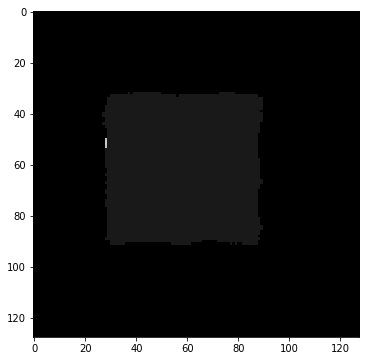

In [53]:
depth = generate_depth_image(img1l, img1r)
plt.imshow(depth, clim=(0, 1));

---
## 2. SSD Stereo (First Image)

In [137]:
# Load images
img2l = cv2.imread('Data/proj2-pair1-L.png', 0)
img2l = img2l.astype(np.float) / 255
img2r = cv2.imread('Data/proj2-pair1-R.png', 0)
img2r = img2r.astype(np.float) / 255

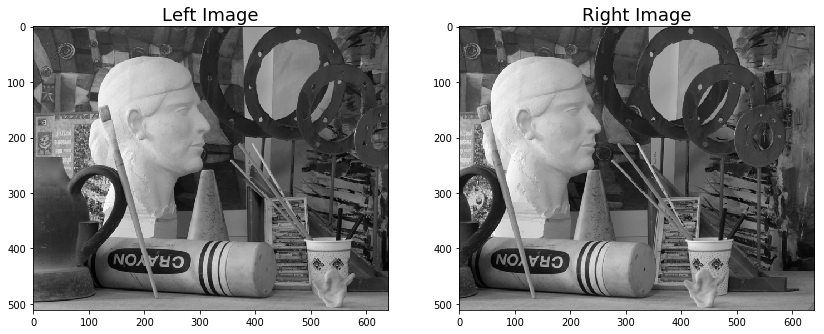

In [138]:
# Plot
fig, ax = plt.subplots(1, 2)
ax[0].set_title('Left Image')
ax[0].imshow(img2l)
ax[1].set_title('Right Image')
ax[1].imshow(img2r);

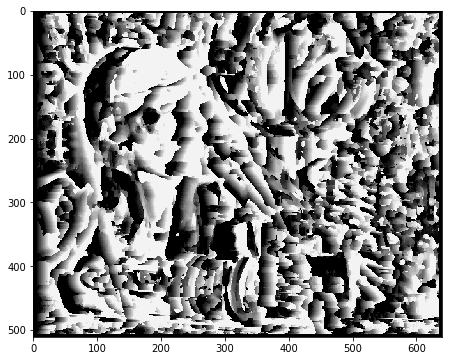

In [140]:
depth = generate_depth_image(img2l, img2r)
plt.imshow(depth, clim=(0, 1));

---
## 3. SSD Stereo with Noise (First Image)

---
## 4. Normalized Correlation Stereo (First Image)

---
## 5. Stereo (Second Image)